In [59]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report
import IPython.display
from sklearn.multiclass import OneVsRestClassifier
from nltk.stem import PorterStemmer

import joblib
import warnings
from skmultilearn.model_selection import iterative_train_test_split
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import neattext as nt
from neattext.functions import clean_text
import neattext.functions as nfx
#lematizer add




from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB



from sklearn.datasets import make_multilabel_classification
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from sklearn.utils import indexable, _safe_indexing
from sklearn.utils.validation import _num_samples
from sklearn.model_selection._split import _validate_shuffle_split
from itertools import chain
import joblib
import warnings
from skmultilearn.model_selection import iterative_train_test_split
warnings.filterwarnings('ignore')


from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
import xgboost

from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import nltk
from nltk.corpus import stopwords
from sklearn.linear_model import SGDClassifier
import time
warnings.filterwarnings("ignore")
from skmultilearn.problem_transform import LabelPowerset
from sklearn.linear_model import SGDRegressor

from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron

from sklearn.linear_model import PassiveAggressiveClassifier
                                                                         
from sklearn.neural_network import MLPClassifier
from pandas.io.json import json_normalize
import neattext as nfx
import neattext.functions as nfx 


from sklearn.svm import SVC



# Prepare Dataset

In [60]:
e_comerce_data = pd.read_json("models/data/products.json")


In [61]:
e_comerce_df = e_comerce_data[["name","description","category"]]

In [62]:
e_comerce_df['number_of_categories'] = e_comerce_df['category'].apply(lambda x: len(x))
e_comerce_df.head()

,name,description,category,number_of_categories
0,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4
2,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4
3,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4
4,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4


In [63]:
products_df = e_comerce_df[~e_comerce_df["name"].duplicated()].sort_values(by=['number_of_categories'],ascending=False) 
products_df.sort_index(inplace=True)
products_df.reset_index(inplace=True)

products_df


,index,name,description,category,number_of_categories
0,0,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4
1,1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4
2,2,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4
3,3,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4
4,4,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",4
...,...,...,...,...,...
48553,51641,Honeywell - True HEPA Replacement Filters for ...,Compatible with select Honeywell air purifier ...,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",3
48554,51642,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,Removes dirt and grime from hard floors; cloth...,"[{'id': 'abcat0900000', 'name': 'Appliances'},...",4
48555,51643,Aleratec - Drive Enclosure - Internal - Black,"1 x Total Bay - 1 x 2.5"" Bay","[{'id': 'abcat0500000', 'name': 'Computers & T...",4
48556,51644,Amazon - Fire TV Stick,"Streams 1080p content; dual-band, dual-antenna...","[{'id': 'abcat0100000', 'name': 'TV & Home The...",3


In [64]:

products_df.drop(['index'], axis=1, inplace=True)
products_df.reset_index(inplace=True)

In [65]:
products_df.drop(['index'], axis=1, inplace=True)

In [66]:
df_list = []
for i in range(len(products_df)):
    df_norm = json_normalize(products_df["category"][i])
    df_norm = df_norm.transpose()
    df_norm = df_norm.drop(["id"])
    df_norm = df_norm.rename(index={"name": i})
    df_list.append(df_norm)
df_category = pd.concat(df_list)
products_df = products_df.join(df_category)





In [67]:
products_df.rename(columns={6: "6nd Subcategory", 5: "5nd Subcategory"}, inplace=True)

In [68]:
products_df = products_df.drop(["6nd Subcategory","5nd Subcategory"], axis=1)

In [69]:
products_df[products_df['name'].isnull()]
products = products_df.drop(products_df.name.index[[38130]])
products.reset_index(inplace=True, drop= True)

In [70]:
counts = products[4].value_counts()
products = products[~products[4].isin(counts[counts <= 5].index)]
products.reset_index(inplace=True, drop= True)

In [71]:
counts = products[3].value_counts()
products = products[~products[3].isin(counts[counts <= 15].index)]
products.reset_index(inplace=True, drop= True)

In [72]:
counts = products[2].value_counts()
products = products[~products[2].isin(counts[counts <= 10].index)]
products.reset_index(inplace=True, drop= True)

In [73]:
counts = products[1].value_counts()
products = products[~products[1].isin(counts[counts <= 10].index)]
products.reset_index(inplace=True, drop= True)

In [74]:
counts = products[0].value_counts()
products = products[~products[0].isin(counts[counts <= 2].index)]
products.reset_index(inplace=True, drop= True)

In [75]:
category_0 = products[0]
category_1 = products[1]
category_2 = products[2]
category_3 = products[3]
category_4 = products[4]


cates = np.concatenate([category_0, category_1, category_2,category_3,category_4])
cates = list(dict.fromkeys(cates))
cates = [x for x in cates if x is not None]


In [76]:
categories = products[[0, 1, 2, 3, 4]]

In [77]:
cat = pd.concat([categories,pd.DataFrame(columns = list(cates))]) 
cat.fillna(0, inplace = True) 
cat.head()

,0,1,2,3,4,Connected Home & Housewares,Carfi Instore Only,Car Electronics & GPS,In-Store Only,Musical Instruments,...,Fountains & Bird Baths,A/V Couplers,Smartwatch Cables,Dart Board Cabinets,iPhone 6s Plus Cases,iPhone 6s Cases,Coffee Beans,Outdoor Accessories,More Microphones,Gaming Mice
0,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
for i in range(5):
  row = 0
  for category in cat[i]:
    if category!= 0:
      cat.loc[row,category] = 1 
    row = row + 1


# Analysis


In [79]:
df2 = pd.concat([products['name'],products['description'],products['number_of_categories'],cat.loc[:,"Connected Home & Housewares":]],axis=1) 


In [80]:
products.isna().sum()

name                        0
description                 0
category                    0
number_of_categories        0
0                           0
1                         664
2                        6398
3                       23244
4                       40130
dtype: int64

In [81]:
print('Number max to categories by product: ',products.number_of_categories.max())
print('Number min to categories by product: ',products.number_of_categories.min())
print('average to categories by product: ',round(products.number_of_categories.mean()))

Number max to categories by product:  7
Number min to categories by product:  1
average to categories by product:  3


[Text(0, 0, '698'),
 Text(0, 0, '5790'),
 Text(0, 0, '17759'),
 Text(0, 0, '19004'),
 Text(0, 0, '4973'),
 Text(0, 0, '333'),
 Text(0, 0, '1')]

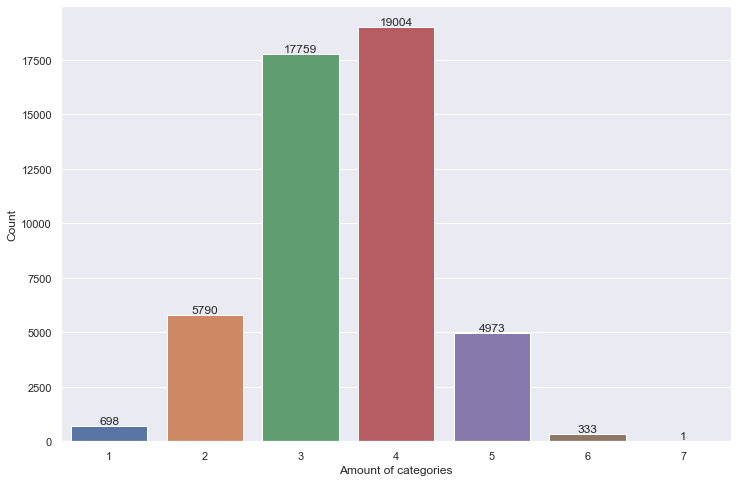

In [82]:
counts = products_df['number_of_categories'].value_counts().rename_axis('Amount of categories').reset_index(name='Count')
sns.set(rc={"figure.figsize":(12, 8)})
ax = sns.barplot(x='Amount of categories', y='Count', data=counts)
ax.bar_label(ax.containers[0])

In [88]:

category = pd.DataFrame()
category['category'] = df2.columns[3:] 
category['count'] = df2.iloc[:,3:].sum().values



In [89]:
categoryHead = category.sort_values('count',ascending=False).head(15)

In [90]:
categoryHead

,category,count
9,Appliances,7970
14,Cell Phones,6409
65,Cell Phone Accessories,5691
6,Video Games,5522
8,Computers & Tablets,5255
0,Connected Home & Housewares,4326
51,Pre-Owned Games,3545
55,Small Kitchen Appliances,3363
10,Audio,3303
7,Cameras & Camcorders,3011


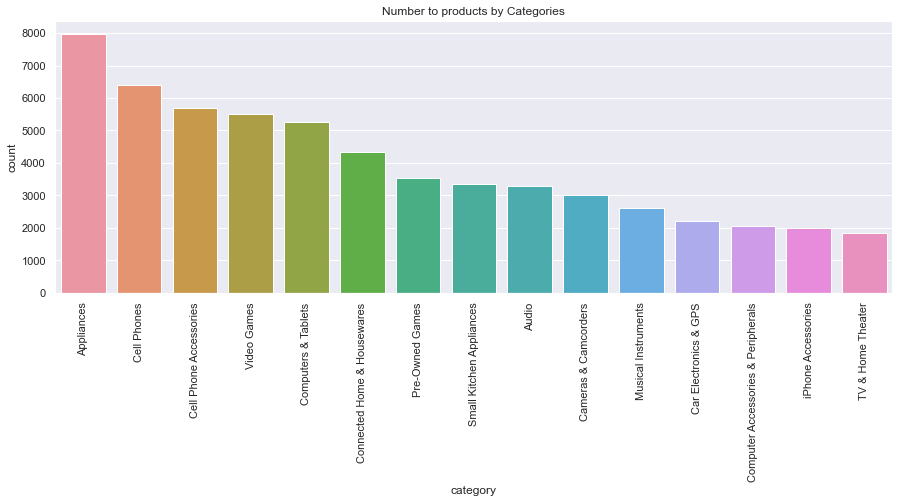

In [91]:
sns.barplot(data=categoryHead,x='category',y='count')

plt.xticks(rotation='vertical')

plt.title("Number to products by Categories")

plt.figure(1).set_size_inches(15, 5)

plt.show()

In [ ]:
for i, c in df2.iterrows():
    df2.loc[i, 'name'] = nfx.clean_text(df2.loc[i, 'name'], puncts=True,
    stopwords=True,
    urls=True,
    emails=True,
    numbers=True,
    emojis=True,
    special_char=True,
    phone_num=True,
    non_ascii=True,
    multiple_whitespaces=True,
    contractions=True,
    currency_symbols=True)

In [ ]:
for i, c in df2.iterrows():
    df2.loc[i, 'description'] = nfx.clean_text(df2.loc[i, 'description'], puncts=True,
    stopwords=True,
    urls=True,
    emails=True,
    numbers=True,
    emojis=True,
    special_char=True,
    phone_num=True,
    non_ascii=True,
    multiple_whitespaces=True,
    contractions=True,
    currency_symbols=True)

In [ ]:
df2['Text'] = df2['name'] + df2['description']


In [ ]:

df2.drop(['description', 'name'], axis=1, inplace=True)
df2.reset_index(inplace=True, drop= True)

# Data Transformation

# Split Dataset

In [ ]:
from sklearn.datasets import make_multilabel_classification
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from sklearn.utils import indexable, _safe_indexing
from sklearn.utils.validation import _num_samples
from sklearn.model_selection._split import _validate_shuffle_split
from itertools import chain

In [ ]:
def multilabel_train_test_split(*arrays,
                                test_size=None,
                                train_size=None,
                                random_state=None,
                                shuffle=True,
                                stratify=None):
    """
    Train test split for multilabel classification. Uses the algorithm from: 
    'Sechidis K., Tsoumakas G., Vlahavas I. (2011) On the Stratification of Multi-Label Data'.
    """
    if stratify is None:
        return train_test_split(*arrays, test_size=test_size,train_size=train_size,
                                random_state=random_state, stratify=None, shuffle=shuffle)
    
    assert shuffle, "Stratified train/test split is not implemented for shuffle=False"
    
    n_arrays = len(arrays)
    arrays = indexable(*arrays)
    n_samples = _num_samples(arrays[0])
    n_train, n_test = _validate_shuffle_split(
        n_samples, test_size, train_size, default_test_size=0.25
    )
    cv = MultilabelStratifiedShuffleSplit(test_size=n_test, train_size=n_train, random_state=123)
    train, test = next(cv.split(X=arrays[0], y=stratify))

    return list(
        chain.from_iterable(
            (_safe_indexing(a, train), _safe_indexing(a, test)) for a in arrays
        )
    )

In [ ]:
X = df2['Text']
Y = df2.drop(columns=['Text','number_of_categories'])
X_train,X_test,Y_train,Y_test = multilabel_train_test_split(np.array(X), np.array(Y),test_size=0.2)


In [ ]:
df2.to_csv('DataNew.csv')

In [ ]:
df2 = pd.read_csv('DataNew.csv',index_col=0)

In [ ]:
df2['Text'][100]

'audiotechnica microphonedetachable hz khz cable'

# Vectorized dataset

In [ ]:
# Create vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))

# Vectorizer X_train
X_train_values = tfidf_vectorizer.fit_transform(X_train)

# Vectorizer X_test
X_test_values = tfidf_vectorizer.transform(X_test)


In [ ]:
joblib.dump(tfidf_vectorizer,'tfidf.plk')

['tfidf.plk']

# Models

#### Passive Aggressive Classifier

In [ ]:
pac = PassiveAggressiveClassifier()
clf = OneVsRestClassifier(pac)
clf.fit(X_train_values, Y_train)

OneVsRestClassifier(estimator=PassiveAggressiveClassifier())

In [ ]:
pre = clf.predict(X_test_values)

In [ ]:
#joblib.dump(clf,'Model_PAC_0.plk')


In [ ]:

print("F1 = ",f1_score(Y_test,pre,average='micro'))
print("recall_score = ",recall_score(Y_test,pre,average='micro'))
print("precision_score = ",precision_score(Y_test,pre,average='micro'))

F1 =  0.930770874776004
recall_score =  0.912043301759134
precision_score =  0.9502836617543389


#### SGD Classifier

In [ ]:

sgd = SGDClassifier()
clf = OneVsRestClassifier(sgd)
clf.fit(X_train_values, Y_train)


OneVsRestClassifier(estimator=SGDClassifier())

In [ ]:
pre = clf.predict(X_test_values)

In [ ]:

print("F1 = ",f1_score(Y_test,pre,average='micro'))
print("recall_score = ",recall_score(Y_test,pre,average='micro'))
print("precision_score = ",precision_score(Y_test,pre,average='micro'))


F1 =  0.8541430703126406
recall_score =  0.7653521489786713
precision_score =  0.966239576977832


#### Logistic Regression

In [ ]:

lr = LogisticRegression(solver='sag')
clf = OneVsRestClassifier(lr)
clf.fit(X_train_values, Y_train)
pre = clf.predict(X_test_values)

print("F1 = ",f1_score(Y_test,pre,average='micro'))
print("recall_score = ",recall_score(Y_test,pre,average='micro'))
print("precision_score = ",precision_score(Y_test,pre,average='micro'))


'\nlr = LogisticRegression(solver=\'sag\')\nclf = OneVsRestClassifier(lr)\nclf.fit(X_train_values, Y_train)\npre = clf.predict(X_test_values)\n\nprint("F1 = ",f1_score(Y_test,pre,average=\'micro\'))\nprint("recall_score = ",recall_score(Y_test,pre,average=\'micro\'))\nprint("precision_score = ",precision_score(Y_test,pre,average=\'micro\'))\n'

#### Linear SVC

In [ ]:

svc = LinearSVC()
clf = OneVsRestClassifier(svc)
clf.fit(X_train_values, Y_train)
pre = clf.predict(X_test_values)

print("F1 = ",f1_score(Y_test,pre,average='micro'))
print("recall_score = ",recall_score(Y_test,pre,average='micro'))
print("precision_score = ",precision_score(Y_test,pre,average='micro'))


F1 =  0.9253393288367058
recall_score =  0.8950641149558606
precision_score =  0.9577343399868997


In [ ]:
joblib.dump(clf,'ModeloSVC0.plk')


['ModeloSVC0.plk']

#### Perceptron

In [ ]:

perceptron = Perceptron()
clf = OneVsRestClassifier(perceptron)
clf.fit(X_train_values, Y_train)
pre = clf.predict(X_test_values)

print("F1 = ",f1_score(Y_test,pre,average='micro'))
print("recall_score = ",recall_score(Y_test,pre,average='micro'))
print("precision_score = ",precision_score(Y_test,pre,average='micro'))


F1 =  0.9090879969247526
recall_score =  0.9143308202848122
precision_score =  0.9039049560453561


In [ ]:
#joblib.dump(clf,'Model_perceptron_0.plk')


### Result

In [ ]:
Y_train_columns = Y.columns

In [ ]:
def modelFuction(text,tfidf_vectorizer):
    
    text = nfx.clean_text(text,stopwords=True,
    urls=True,
    emails=True,
    numbers=True,
    emojis=True,
    special_char=True,
    phone_num=True,
    non_ascii=True,
    multiple_whitespaces=True,
    contractions=True,
    currency_symbols=True)

    m = joblib.load('ModeloSVC0.plk')

    print(tfidf_vectorizer.idf_.shape)
    text_vectorizer = tfidf_vectorizer.transform([text])
    print(tfidf_vectorizer.idf_.shape)
    prediction = m.predict(text_vectorizer)
    
    re = []
   
    for pre in np.where(prediction==1)[1]:
    
        re.append(Y_train_columns[pre])

    return  re

In [ ]:
h = modelFuction("duracell aaa batteries packcompatible",tfidf_vectorizer)

(241329,)
(241329,)


In [ ]:
h

['Musical Instruments', 'Sheet Music & DVDs', 'Instrument Instructional DVDs']

In [ ]:

DF = pd.read_csv('DataNew.csv',index_col=0)

Y_train_columns = DF.columns[2:]

In [ ]:
def modelFuction1(text):
    
    text = nfx.clean_text(text,stopwords=True,
    urls=True,
    emails=True,
    numbers=True,
    emojis=True,
    special_char=True,
    phone_num=True,
    non_ascii=True,
    multiple_whitespaces=True,
    contractions=True,
    currency_symbols=True)

    m = joblib.load('ModeloSVC0.plk')

    text_vectorizer = tfidf_vectorizer.transform([text])
    
    prediction = m.predict(text_vectorizer)
    
    re = []
   
    for pre in np.where(prediction==1)[1]:
    
        re.append(Y_train_columns[pre])

    return prediction

In [ ]:
l = modelFuction1("duracell aaa batteries packcompatible")